In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
manip = ExperimentClass.Experiment("20240417_NPQ_penicilin", "SpeedZen")

In [3]:
normalising_vector = []
for col in manip.Data.columns:
    normalising_vector.append(manip.Data[col][6])
manip.Data = manip.Data.div(normalising_vector, axis=1)

manip.annotations

,E,souche,conc_pen_U_mL,Culture,actinic_light,illumination
0,11,WT4A,0,1,220,0
1,12,WT4A,0,1,220,0
2,13,WT4A,0,1,220,0
3,14,WT4A,0,2,220,0
4,15,WT4A,0,2,220,0
5,16,WT4A,0,2,220,0
6,17,WT4A,500,3,220,0
7,18,WT4A,500,3,220,0
8,19,WT4A,500,3,220,0
9,20,WT4A,500,4,220,0


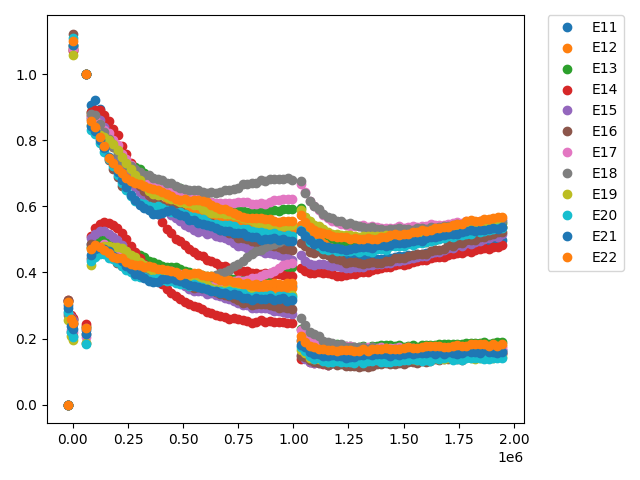

In [4]:
fig, ax = plt.subplots()
for i, col in enumerate(manip.Data.columns):
    ax.plot(manip.Time, manip.Data[col], 'o', label=col)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()

In [5]:
def get_kinetics(time, data):
    time_Fstat = time[3::2]/(1000*60)
    Fstat = data[3::2]
    time_Fmax = time[4::2]/(1000*60)
    Fmax = data[4::2]
    return time_Fstat, Fstat, time_Fmax, Fmax


In [6]:
time_Fstat = []
time_Fmax = []
Fstat = []
Fmax = []
Phi_PSII = []
NPQ = []
for recor in manip.annotations.E:
    aux_time_Fstat, aux_Fstat, aux_time_Fmax, aux_Fmax = get_kinetics(manip.Time, manip.Data[f"E{recor}"])
    time_Fstat.append(aux_time_Fstat.values)
    Fstat.append(aux_Fstat.values)
    time_Fmax.append(aux_time_Fmax.values)
    Fmax.append(aux_Fmax.values)
    Phi_PSII.append((Fmax[-1]-Fstat[-1])/Fmax[-1])
    NPQ.append((Fmax[-1][0]-Fmax[-1])/Fmax[-1])

time_Fstat = np.array(time_Fstat)
time_Fmax = np.array(time_Fmax)
Fstat = np.array(Fstat)
Fmax = np.array(Fmax)
Phi_PSII = np.array(Phi_PSII)
NPQ = np.array(NPQ)


In [7]:
Fmax

array([[1.07321001, 1.        , 0.90596013, ..., 0.49081312, 0.49523708,
        0.49697105],
       [1.07694551, 1.        , 0.87635695, ..., 0.53251563, 0.5334156 ,
        0.53640931],
       [1.08682045, 1.        , 0.88612014, ..., 0.54447054, 0.54761325,
        0.54854021],
       ...,
       [1.10939887, 1.        , 0.83224672, ..., 0.53170316, 0.53340065,
        0.53537834],
       [1.08800841, 1.        , 0.84351659, ..., 0.53507821, 0.53134413,
        0.53648048],
       [1.10050188, 1.        , 0.85857956, ..., 0.56351585, 0.56680351,
        0.56698148]])

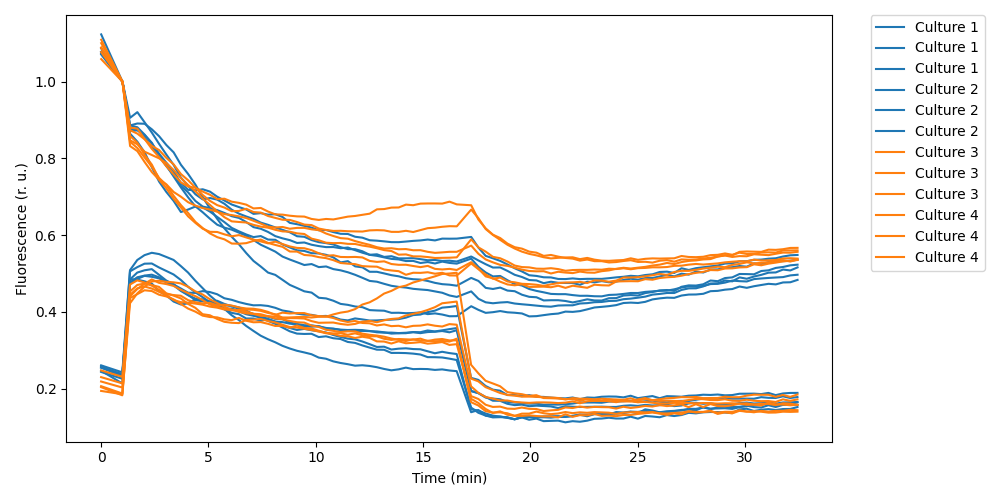

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

Culture = [1, 2, 3, 4]

Culture_condition = manip.annotations.Culture.isin(Culture)

records = list(manip.annotations[(Culture_condition)].E.astype(int))

for i, record in enumerate(records):
    index = manip.annotations[manip.annotations.E == record].index[0]
    if manip.annotations.iloc[index].conc_pen_U_mL == 0:
        color = 'C0'
    else:
        color = 'C1'
    ax.plot(time_Fstat[index], Fstat[index], '-', markersize=2, label=f'Culture {manip.annotations[manip.annotations.E == record].Culture.values[0]}', color=color)
    ax.plot(time_Fmax[index], Fmax[index], '-', markersize=2, color=color)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("Fluorescence (r. u.)")
fig.tight_layout()


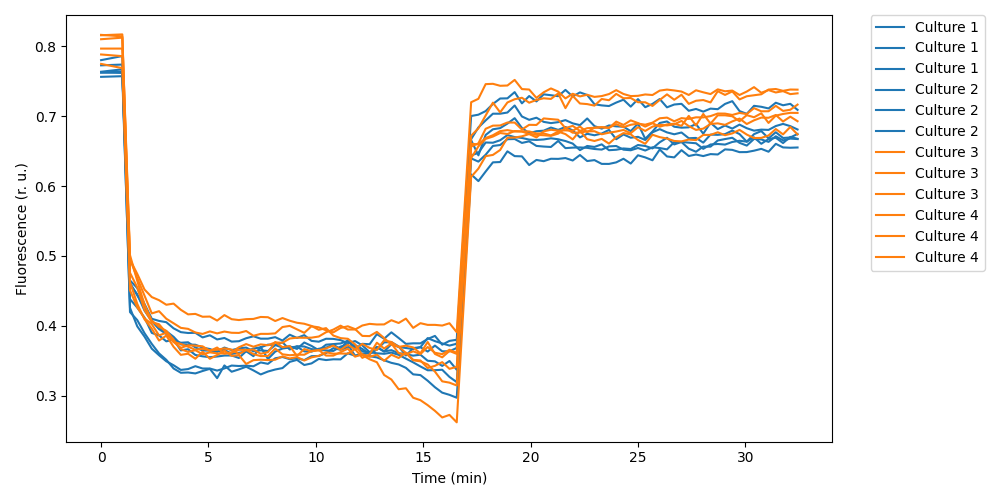

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

Culture = [1, 2, 3, 4]

Culture_condition = manip.annotations.Culture.isin(Culture)

records = list(manip.annotations[(Culture_condition)].E.astype(int))

for i, record in enumerate(records):
    index = manip.annotations[manip.annotations.E == record].index[0]
    if manip.annotations.iloc[index].conc_pen_U_mL == 0:
        color = 'C0'
    else:
        color = 'C1'
    ax.plot(time_Fstat[index], Phi_PSII[index], '-', markersize=2, label=f'Culture {manip.annotations[manip.annotations.E == record].Culture.values[0]}', color=color)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("Fluorescence (r. u.)")
fig.tight_layout()

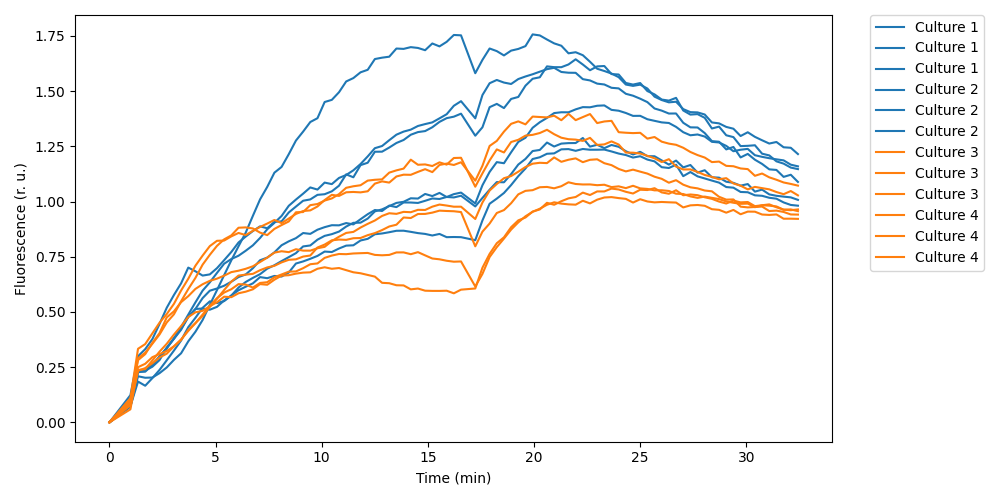

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

Culture = [1, 2, 3, 4]

Culture_condition = manip.annotations.Culture.isin(Culture)

records = list(manip.annotations[(Culture_condition)].E.astype(int))

for i, record in enumerate(records):
    index = manip.annotations[manip.annotations.E == record].index[0]
    if manip.annotations.iloc[index].conc_pen_U_mL == 0:
        color = 'C0'
    else:
        color = 'C1'
    ax.plot(time_Fstat[index], NPQ[index], '-', markersize=2, label=f'Culture {manip.annotations[manip.annotations.E == record].Culture.values[0]}', color=color)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("Fluorescence (r. u.)")
fig.tight_layout()

In [11]:
control = [0, 1, 2, 3, 4, 5]
penicilin = [6, 7, 8, 9, 10, 11]

control_Fmax = np.mean(Fmax[control], axis=0)
control_Fmax_std = np.std(Fmax[control], axis=0)
control_Fstat = np.mean(Fstat[control], axis=0)
control_Fstat_std = np.std(Fstat[control], axis=0)
control_Phi_PSII = np.mean(Phi_PSII[control], axis=0)
control_Phi_PSII_std = np.std(Phi_PSII[control], axis=0)
control_NPQ = np.mean(NPQ[control], axis=0)
control_NPQ_std = np.std(NPQ[control], axis=0)

penicilin_Fmax = np.mean(Fmax[penicilin], axis=0)
penicilin_Fmax_std = np.std(Fmax[penicilin], axis=0)
penicilin_Fstat = np.mean(Fstat[penicilin], axis=0)
penicilin_Fstat_std = np.std(Fstat[penicilin], axis=0)
penicilin_Phi_PSII = np.mean(Phi_PSII[penicilin], axis=0)
penicilin_Phi_PSII_std = np.std(Phi_PSII[penicilin], axis=0)
penicilin_NPQ = np.mean(NPQ[penicilin], axis=0)
penicilin_NPQ_std = np.std(NPQ[penicilin], axis=0)




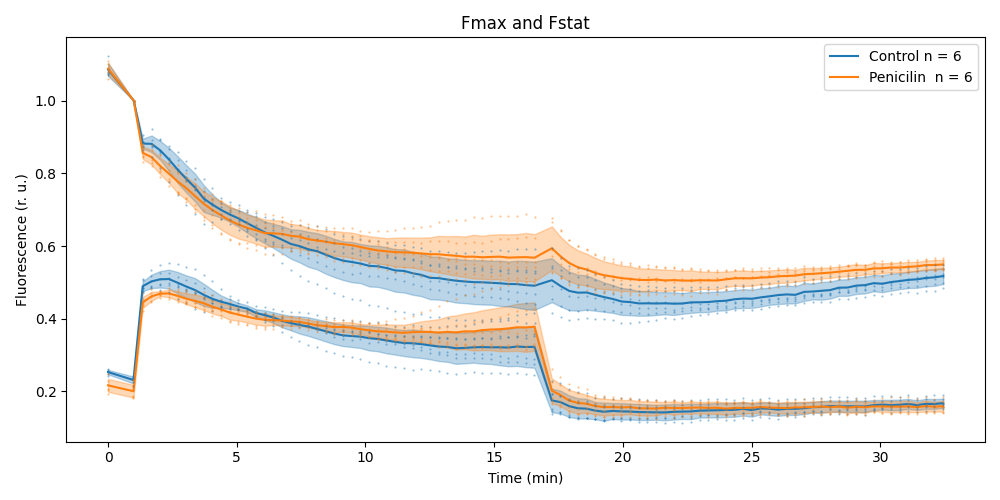

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time_Fstat[0], control_Fstat, '-', markersize=2, label='Control n = 6', color='C0')
ax.fill_between(time_Fstat[0], control_Fstat-control_Fstat_std, control_Fstat+control_Fstat_std, color='C0', alpha=0.3)
ax.plot(time_Fstat[0], penicilin_Fstat, '-', markersize=2, label='Penicilin  n = 6', color='C1')
ax.fill_between(time_Fstat[0], penicilin_Fstat-penicilin_Fstat_std, penicilin_Fstat+penicilin_Fstat_std, color='C1', alpha=0.3)

ax.plot(time_Fmax[0], control_Fmax, '-', markersize=2, color='C0')
ax.fill_between(time_Fmax[0], control_Fmax-control_Fmax_std, control_Fmax+control_Fmax_std, color='C0', alpha=0.3)
ax.plot(time_Fmax[0], penicilin_Fmax, '-', markersize=2, color='C1')
ax.fill_between(time_Fmax[0], penicilin_Fmax-penicilin_Fmax_std, penicilin_Fmax+penicilin_Fmax_std, color='C1', alpha=0.3)

for i in control:
    ax.plot(time_Fstat[i], Fstat[i], 'o', markersize=0.5, color='C0', alpha = 0.5)
    ax.plot(time_Fmax[i], Fmax[i], 'o', markersize=0.5, color='C0', alpha = 0.5)

for i in penicilin:
    ax.plot(time_Fstat[i], Fstat[i], 'o', markersize=0.5, color='C1', alpha = 0.5)
    ax.plot(time_Fmax[i], Fmax[i], 'o', markersize=0.5, color='C1', alpha = 0.5)

ax.legend()
ax.set_xlabel("Time (min)")
ax.set_ylabel("Fluorescence (r. u.)")
ax.set_title("Fmax and Fstat")
fig.tight_layout()

fig.savefig(manip.fig_folder + "Fmax_Fstat.png", dpi=300)

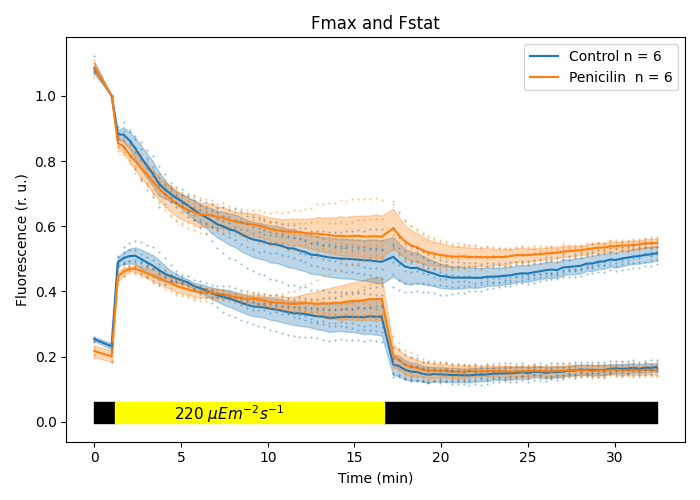

In [57]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(time_Fstat[0], control_Fstat, '-', markersize=2, label='Control n = 6', color='C0')
ax.fill_between(time_Fstat[0], control_Fstat-control_Fstat_std, control_Fstat+control_Fstat_std, color='C0', alpha=0.3)
ax.plot(time_Fstat[0], penicilin_Fstat, '-', markersize=2, label='Penicilin  n = 6', color='C1')
ax.fill_between(time_Fstat[0], penicilin_Fstat-penicilin_Fstat_std, penicilin_Fstat+penicilin_Fstat_std, color='C1', alpha=0.3)

ax.plot(time_Fmax[0], control_Fmax, '-', markersize=2, color='C0')
ax.fill_between(time_Fmax[0], control_Fmax-control_Fmax_std, control_Fmax+control_Fmax_std, color='C0', alpha=0.3)
ax.plot(time_Fmax[0], penicilin_Fmax, '-', markersize=2, color='C1')
ax.fill_between(time_Fmax[0], penicilin_Fmax-penicilin_Fmax_std, penicilin_Fmax+penicilin_Fmax_std, color='C1', alpha=0.3)

for i in control:
    ax.plot(time_Fstat[i], Fstat[i], 'o', markersize=0.5, color='C0', alpha = 0.5)
    ax.plot(time_Fmax[i], Fmax[i], 'o', markersize=0.5, color='C0', alpha = 0.5)

    

for i in penicilin:
    ax.plot(time_Fstat[i], Fstat[i], 'o', markersize=0.5, color='C1', alpha = 0.5)
    ax.plot(time_Fmax[i], Fmax[i], 'o', markersize=0.5, color='C1', alpha = 0.5)


ax.legend()
ax.set_xlabel("Time (min)")
ax.set_ylabel("Fluorescence (r. u.)")
ax.set_title("Fmax and Fstat")


scale = ax.get_ylim()[1] - ax.get_ylim()[0]
up = ax.get_ylim()[0]
down = up - scale*0.06

light_on = 1.2
light_off = 16.7

time = np.linspace(time_Fstat[0][0], time_Fstat[0][-1], 1000)
ax.fill_between(time, down, up, color='black', where=(time < light_on) | (time > light_off))
ax.fill_between(time, down, up, color='yellow', where=(time >= light_on) & (time <= light_off))

ax.text((light_off-light_on)/2, up - scale*0.035, "220 $µE m^{-2} s^{-1}$", horizontalalignment='center', verticalalignment='center', fontsize=11)

fig.tight_layout()

fig.savefig(manip.fig_folder + "Fmax_Fstat.png", dpi=300)

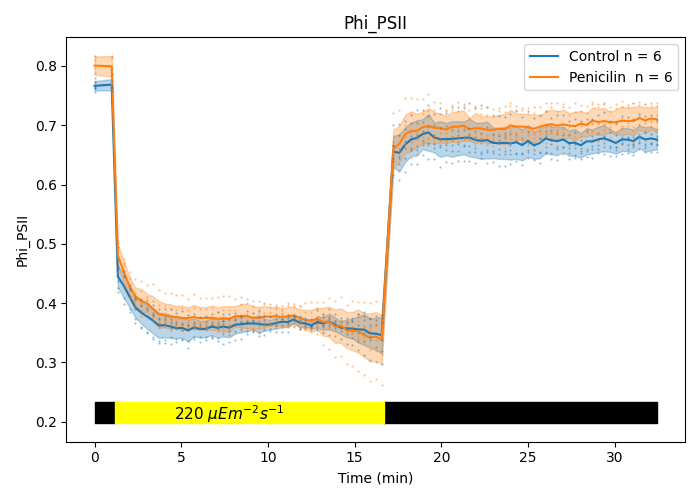

In [58]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(time_Fstat[0], control_Phi_PSII, '-', markersize=2, label='Control n = 6', color='C0')
ax.fill_between(time_Fstat[0], control_Phi_PSII-control_Phi_PSII_std, control_Phi_PSII+control_Phi_PSII_std, color='C0', alpha=0.3)
ax.plot(time_Fstat[0], penicilin_Phi_PSII, '-', markersize=2, label='Penicilin  n = 6', color='C1')
ax.fill_between(time_Fstat[0], penicilin_Phi_PSII-penicilin_Phi_PSII_std, penicilin_Phi_PSII+penicilin_Phi_PSII_std, color='C1', alpha=0.3)

for i in control:
    ax.plot(time_Fstat[i], Phi_PSII[i], 'o', markersize=0.5, color='C0', alpha = 0.5)

for i in penicilin:
    ax.plot(time_Fstat[i], Phi_PSII[i], 'o', markersize=0.5, color='C1', alpha = 0.5)


ax.legend()
ax.set_xlabel("Time (min)")
ax.set_ylabel("Phi_PSII")
ax.set_title("Phi_PSII")

scale = ax.get_ylim()[1] - ax.get_ylim()[0]
up = ax.get_ylim()[0]
down = up - scale*0.06

light_on = 1.2
light_off = 16.7

time = np.linspace(time_Fstat[0][0], time_Fstat[0][-1], 1000)
ax.fill_between(time, down, up, color='black', where=(time < light_on) | (time > light_off))
ax.fill_between(time, down, up, color='yellow', where=(time >= light_on) & (time <= light_off))

ax.text((light_off-light_on)/2, up - scale*0.035, "220 $µE m^{-2} s^{-1}$", horizontalalignment='center', verticalalignment='center', fontsize=11)

fig.tight_layout()

fig.savefig(manip.fig_folder + "Phi_PSII.png", dpi=300)

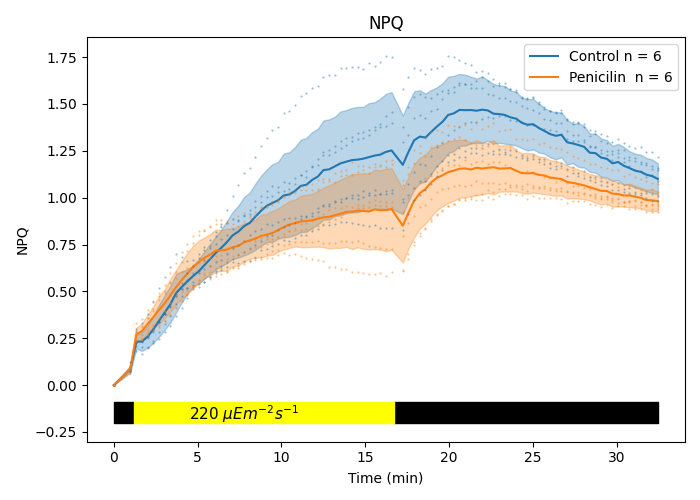

In [59]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(time_Fstat[0], control_NPQ, '-', markersize=2, label='Control n = 6', color='C0')
ax.fill_between(time_Fstat[0], control_NPQ-control_NPQ_std, control_NPQ+control_NPQ_std, color='C0', alpha=0.3)
ax.plot(time_Fstat[0], penicilin_NPQ, '-', markersize=2, label='Penicilin  n = 6', color='C1')
ax.fill_between(time_Fstat[0], penicilin_NPQ-penicilin_NPQ_std, penicilin_NPQ+penicilin_NPQ_std, color='C1', alpha=0.3)

for i in control:
    ax.plot(time_Fstat[i], NPQ[i], 'o', markersize=0.5, color='C0', alpha = 0.5)

for i in penicilin:
    ax.plot(time_Fstat[i], NPQ[i], 'o', markersize=0.5, color='C1', alpha = 0.5)


ax.legend()
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
ax.set_title("NPQ")

scale = ax.get_ylim()[1] - ax.get_ylim()[0]
up = ax.get_ylim()[0]
down = up - scale*0.06

light_on = 1.2
light_off = 16.7

time = np.linspace(time_Fstat[0][0], time_Fstat[0][-1], 1000)
ax.fill_between(time, down, up, color='black', where=(time < light_on) | (time > light_off))
ax.fill_between(time, down, up, color='yellow', where=(time >= light_on) & (time <= light_off))

ax.text((light_off-light_on)/2, up - scale*0.035, "220 $µE m^{-2} s^{-1}$", horizontalalignment='center', verticalalignment='center', fontsize=11)

fig.tight_layout()

fig.savefig(manip.fig_folder + "NPQ.png", dpi=300)

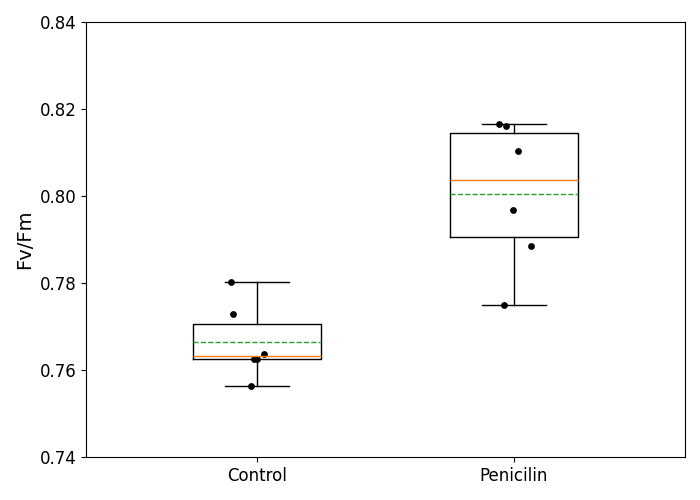

In [60]:
Phi_0 = Phi_PSII[:,0]
Phi_0_control = Phi_0[control]
Phi_0_penicilin = Phi_0[penicilin]

import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 5))

bp = ax.boxplot([Phi_0_control, Phi_0_penicilin], labels=['Control', 'Penicilin'], showmeans=True, meanline=True, positions=[1, 1.3])


y = Phi_0_control
x = np.random.normal(1, 0.02, size=len(y))
ax.scatter(x, y, color = 'k', s =15)

y = Phi_0_penicilin
x = np.random.normal(1.3, 0.02, size=len(y))
ax.scatter(x, y, color = 'k', s =15)

# Increase size of y-label
ax.set_ylabel("Fv/Fm", fontsize=14)

# Increase size of tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_ylabel("Fv/Fm")

ax.set_ylim(0.74, 0.84)
ax.set_xlim(0.8, 1.5)

fig.tight_layout()

fig.savefig(manip.fig_folder + "FvFm.png", dpi=300)


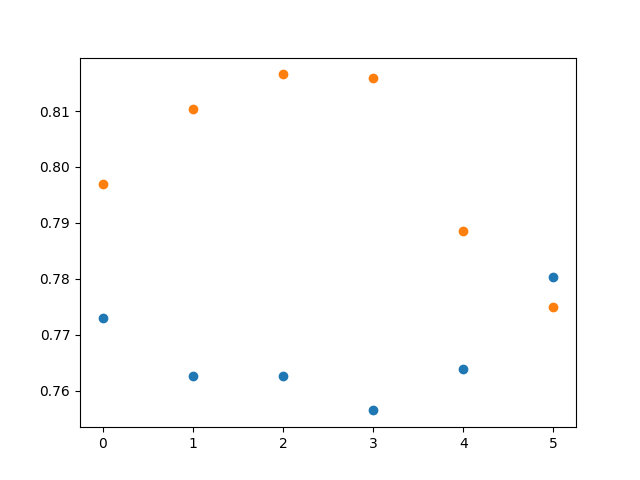

In [16]:
fig, ax = plt.subplots()
ax.plot(Phi_0_control, 'o', label='Control')
ax.plot(Phi_0_penicilin, 'o', label='Penicilin')

In [17]:
.dropna()

SyntaxError: invalid syntax (2902770825.py, line 1)